<a href="https://colab.research.google.com/github/GruheshKurra/FMML_Project_and_Labs/blob/main/AIML_III_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

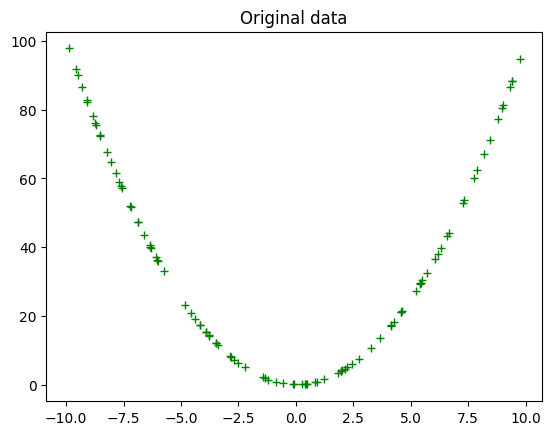

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


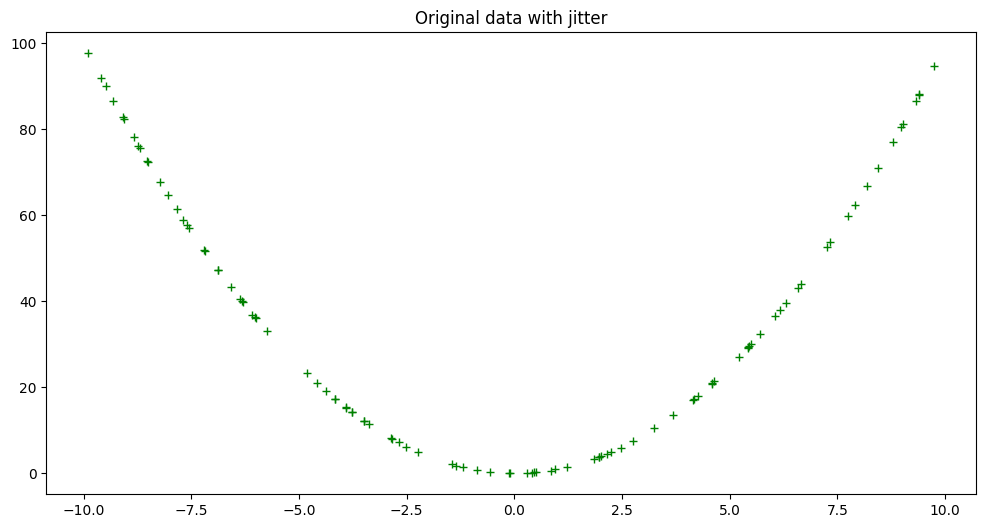

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

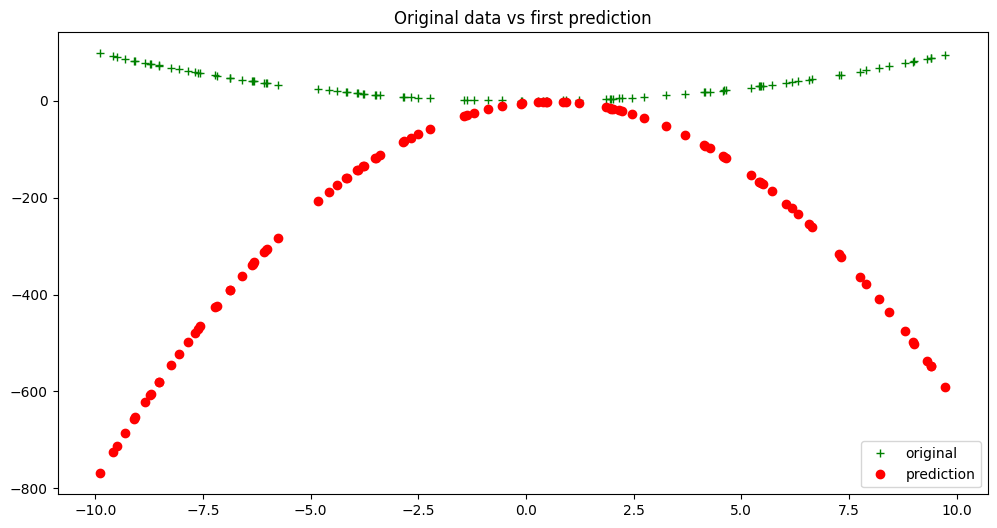

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


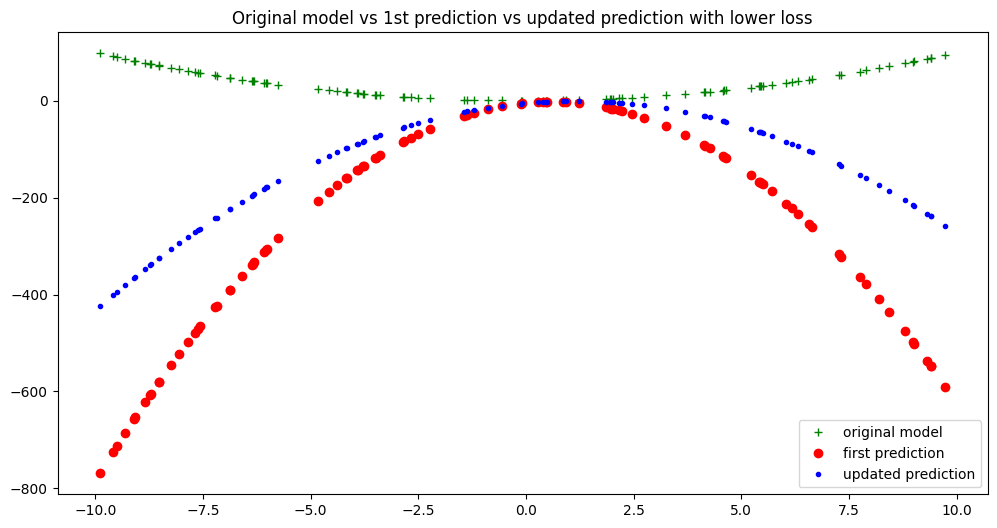

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

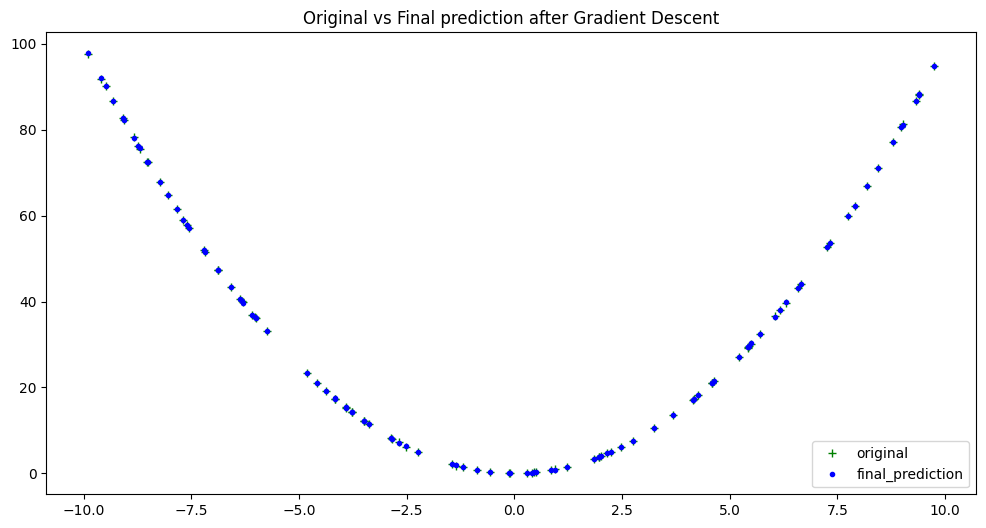

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


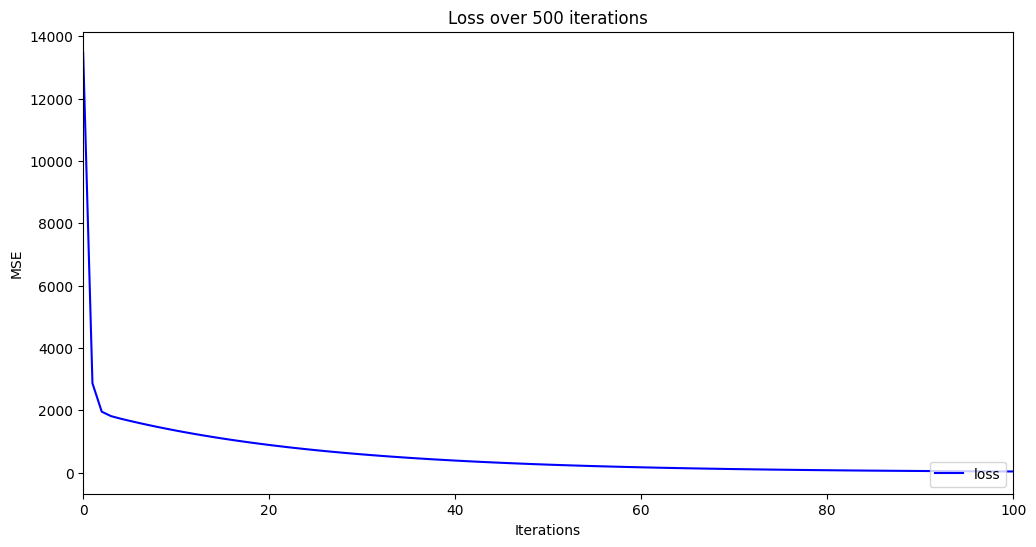

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



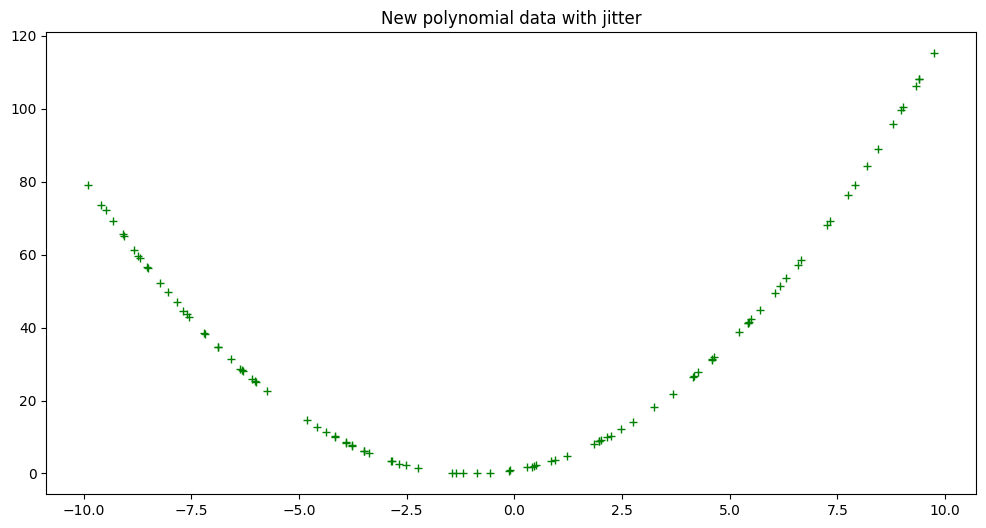

[12510.857817251059, 1996.4472241085105, 1125.1965543688855, 1017.1197429859792, 970.9241245867968, 931.1644340043324, 893.3985891133566, 857.2146847662527, 822.5215808960897, 789.2558789517861, 757.3586835539456, 726.7736722864515, 697.446852036768, 669.3264522715841, 642.3628327254617, 616.508395679174, 591.717501910012, 567.9463901053992, 545.1530995927776, 523.2973962489416, 502.34070145797574, 482.24602399234556, 462.97789469687166, 444.5023038602469, 426.78664116352155, 409.7996380995203, 393.511312761515, 377.89291690367224, 362.916885179795, 348.5567864707328, 334.7872772145119, 321.58405665678566, 308.9238239425877, 296.7842369736242, 285.1438729584586, 273.982190585932, 263.2794937550262, 253.0168967971341, 243.17629112931695, 233.74031327968044, 224.69231422840218, 216.01633001028262, 207.69705352690468, 199.719807518637, 192.0705186487532, 184.73569265390736, 177.7023905170898, 170.95820562099064, 164.49124184142937, 158.29009254217297, 152.34382043404833, 146.6419382627909

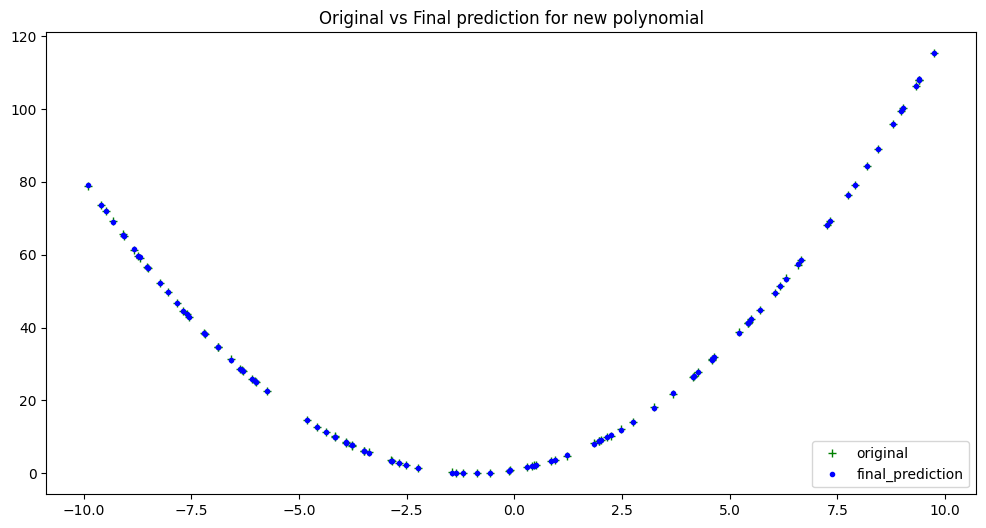

Final Coefficients predicted: (0.9998014550452458, 1.9996245553737386, 1.0058538784526558)
Original Coefficients: [1, 2, 1]


In [18]:
# Change the coefficients to represent a different polynomial
coeffs = [1, 2, 1]  # This represents x^2 + 2x + 1

# Generate new data points
xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

# Plot the new data
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('New polynomial data with jitter')
plt.show()

# Run gradient descent with the new data
GD = gradient_descent(30000, 0.0003)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD[2], 'b.', label='final_prediction')
plt.title('Original vs Final prediction for new polynomial')
plt.legend(loc="lower right")
plt.show()

print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

[48432.197130531684, 16676.51421377384, 6239.752765247738, 2802.6746884117933, 1663.912460153042, 1279.8870551432963, 1143.8007497830238, 1089.257188528698, 1061.6223611431226, 1042.956668701933, 1027.36823510718, 1012.9207798766663, 998.9767691863963, 985.3251052798727, 971.8947246481747, 958.6605647798278, 945.6126903483114, 932.7461562338649, 920.0576789733828, 907.5445435927442, 895.2042443757719, 883.034366607393, 871.0325474390025, 859.1964627358788, 847.5238224593531, 836.0123688552993, 824.6598755680775, 813.4641470623558, 802.4230181499864, 791.5343535552823, 780.7960474967579, 770.20602327809, 759.7622328858521, 749.4626565931715, 739.3053025689871, 729.2882064927454, 719.4094311744234, 709.6670661798127, 700.0592274609725, 690.5840569917965, 681.2397224086034, 672.0244166556982, 662.9363576358274, 653.9737878654587, 645.1349741348293, 636.4182071726798, 627.8218013156271, 619.3440941820976, 610.983446350771, 602.7382410434565, 594.6068838123564, 586.587802231645, 578.6794455

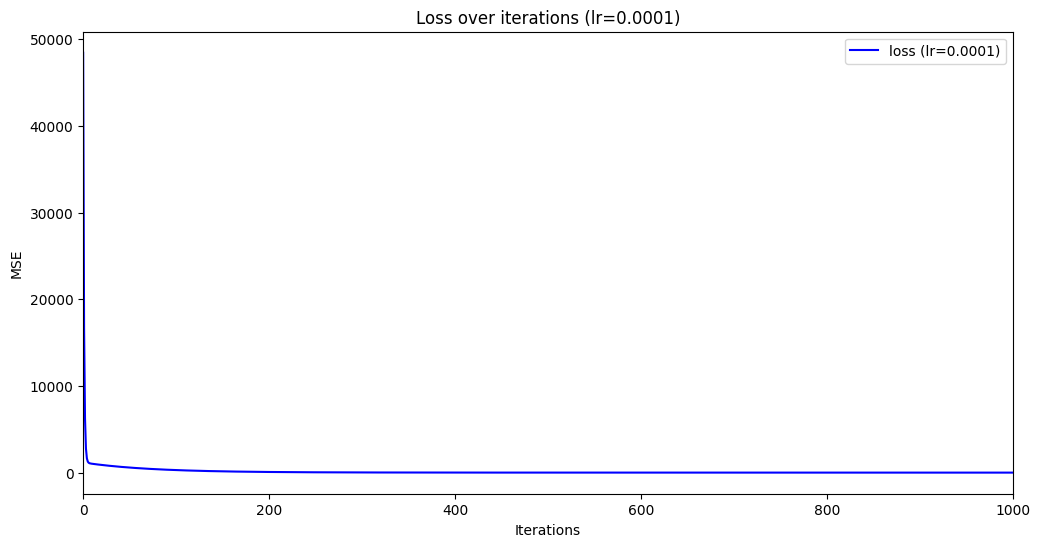

Final loss for lr=0.0001: 0.10482274425897564
Final Coefficients for lr=0.0001: (1.007985218559097, 2.000532696041477, 0.5137289433362681)
---


<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-bad7532be911>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-12-bad7532be911>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-bad7532be911>:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[1540051.3374314616, 16457775.582255842, 175976159.73723966, 1881726813.3265653, 20121527090.019676, 215161931460.52094, 2300752705667.3486, 24602228597522.64, 263074623610258.8, 2813088957134939.0, 3.008070247203625e+16, 3.216566112906761e+17, 3.439513278760154e+18, 3.6779133956853764e+19, 3.9328375411994506e+20, 4.205431031522544e+21, 4.4969185672233275e+22, 4.808609735520178e+23, 5.141904893958698e+24, 5.498301461899847e+25, 5.879400648084571e+26, 6.286914644500608e+27, 6.722674318871773e+28, 7.188637440330325e+29, 7.686897475228507e+30, 8.219692992606849e+31, 8.789417721575848e+32, 9.398631305796603e+33, 1.0050070803377688e+35, 1.0746662983854951e+36, 1.149153747750147e+37, 1.2288040836044812e+38, 1.3139751567962965e+39, 1.405049621590918e+40, 1.5024366548498077e+41, 1.606573794369166e+42, 1.7179289046377547e+43, 1.8370022788456574e+44, 1.964328886587836e+45, 2.1004807773608666e+46, 2.246069650651253e+47, 2.401749604162136e+48, 2.5682200725255467e+49, 2.7462289697031394e+50, 2.9365

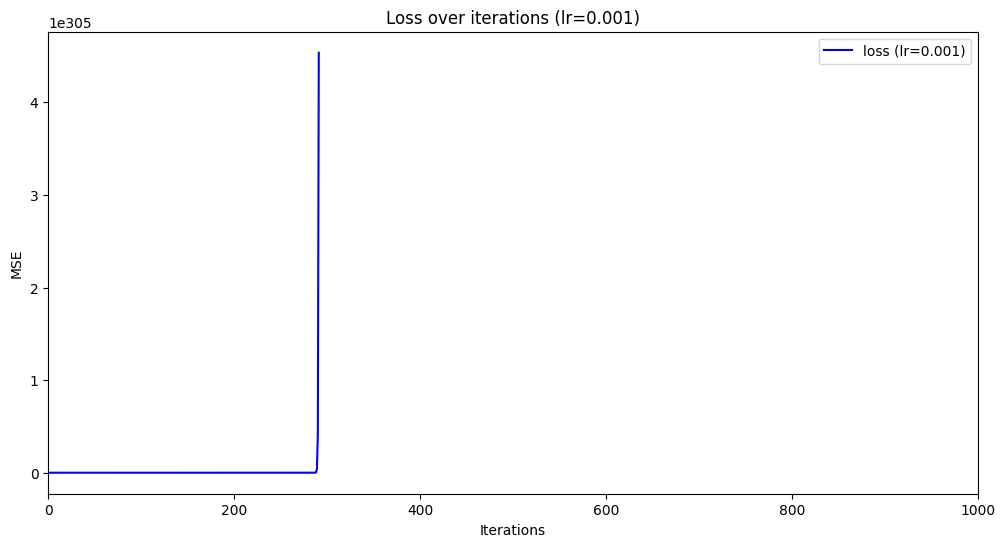

Final loss for lr=0.001: nan
Final Coefficients for lr=0.001: (nan, nan, nan)
---
[250275173.5316674, 435207853306.1272, 756790886140404.6, 1.3159974964291036e+18, 2.2884120862502043e+21, 3.9793615798707027e+24, 6.919784543394392e+27, 1.203293974822858e+31, 2.0924298737410392e+34, 3.6385645304743484e+37, 6.327166328760078e+40, 1.100242510927141e+44, 1.913231800701668e+47, 3.3269537278027834e+50, 5.785300611709199e+53, 1.0060164915472722e+57, 1.749380454347869e+60, 3.0420296285078843e+63, 5.289840890653773e+66, 9.198600955822388e+69, 1.599561523560289e+73, 2.781506752975308e+76, 4.8368129033429074e+79, 8.410822313093314e+82, 1.4625732563179333e+86, 2.543295352662994e+89, 4.4225827478627796e+92, 7.690509928866002e+95, 1.33731682000903e+99, 2.3254846474696303e+102, 4.043827733790438e+105, 7.031885916067427e+108, 1.2227874872958157e+112, 2.1263274986739363e+115, 3.697509729687955e+118, 6.429667212441749e+121, 1.118066576831897e+125, 1.9442263945008496e+128, 3.3808507931474562e+131, 5.87902

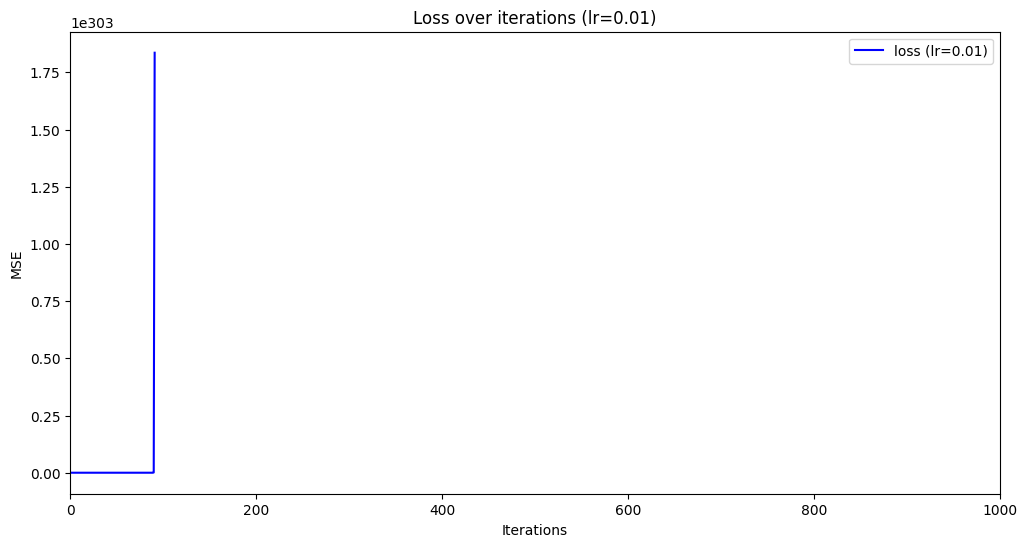

Final loss for lr=0.01: nan
Final Coefficients for lr=0.01: (nan, nan, nan)
---
[26119519474.59668, 4740133813208552.0, 8.60234211882974e+20, 1.5611434796619375e+26, 2.8331458228758286e+31, 5.141561527334393e+36, 9.330848672141847e+41, 1.6933520386665385e+47, 3.0730764452510566e+52, 5.5769849521624325e+57, 1.0121050260467995e+63, 1.836756944004314e+68, 3.3333260724189625e+73, 6.049283080887555e+78, 1.0978171651282999e+84, 1.992306380665377e+89, 3.615615459953292e+94, 6.561578721585647e+99, 1.1907880081949246e+105, 2.161028832582797e+110, 3.9218110890563366e+115, 7.117259143582463e+120, 1.2916322731163688e+126, 2.344039882909213e+131, 4.253937507625301e+136, 7.719998473883569e+141, 1.4010167363750143e+147, 2.5425495901885575e+152, 4.614190716446674e+157, 8.37378199029098e+162, 1.5196646417536947e+168, 2.757870489193537e+173, 5.004952689027136e+178, 9.08293247183083e+183, 1.6483604823820075e+189, 2.9914262693301325e+194, 5.428807121065498e+199, 9.852138780719834e+204, 1.787955187759792e+

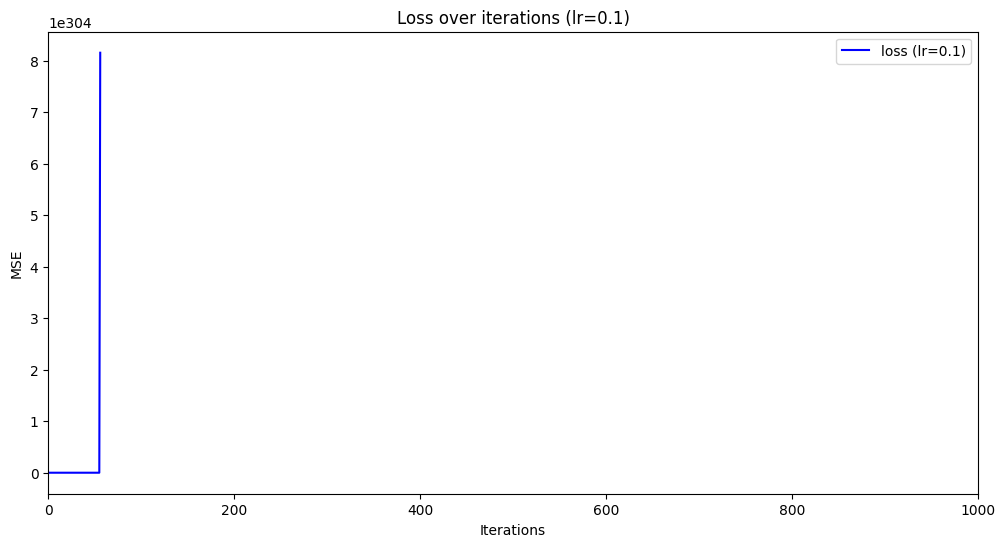

Final loss for lr=0.1: nan
Final Coefficients for lr=0.1: (nan, nan, nan)
---


<ipython-input-12-bad7532be911>:22: RuntimeWarning: overflow encountered in scalar multiply
  partial_a = x_squared * (y - y_bar)
<ipython-input-12-bad7532be911>:24: RuntimeWarning: overflow encountered in scalar multiply
  partial_b = x * (y - y_bar)
<ipython-input-12-bad7532be911>:34: RuntimeWarning: overflow encountered in scalar add
  gradient_c = (-2 / n) * sum(c_s)


[2623001270397.514, 4.780318083990754e+19, 8.711962575743783e+26, 1.5877247209988068e+34, 2.8935727945960174e+41, 5.273435254166141e+48, 9.610651382891804e+55, 1.751507614140325e+63, 3.192061391231578e+70, 5.817420285890327e+77, 1.0602045084612538e+85, 1.9321856502061947e+92, 3.521340795165251e+99, 6.4175204874188815e+106, 1.169570672142466e+114, 2.1315016598972277e+121, 3.884587254417077e+128, 7.0795244597216e+135, 1.2902185816216738e+143, 2.3513782568770256e+150, 4.285304665171286e+157, 7.809817931092317e+164, 1.423312013554892e+172, 2.593936383413664e+179, 4.727358370559877e+186, 8.615445354250494e+193, 1.5701347948216896e+201, 2.8615157691104937e+208, 5.21501244598423e+215, 9.504177857536148e+222, 1.7321031863929182e+230, 3.1566975000721108e+237, 5.752970830631016e+244, 1.048458820565966e+252, 1.9107795446652787e+259, 3.482328916209006e+266, 6.3464227019395175e+273, 1.1566133493082093e+281, 2.1078873920407577e+288, 3.841551076841657e+295, 7.001092530704761e+302, inf, inf, inf, inf,

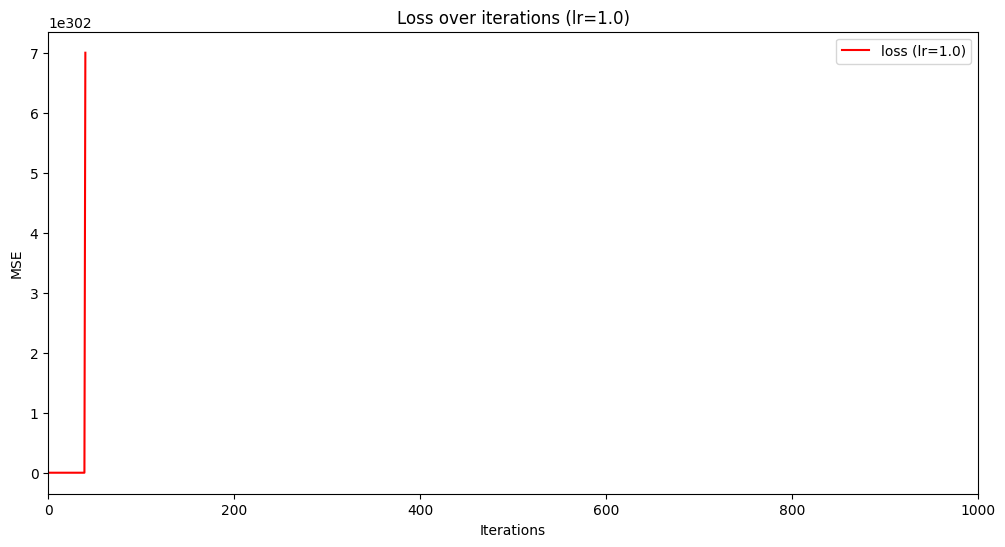

Final loss for lr=1.0: nan
Final Coefficients for lr=1.0: (nan, nan, nan)


In [19]:
# Try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    GD = gradient_descent(30000, lr)

    plt.figure(figsize=(12, 6))
    plt.plot(GD[3], 'b-', label=f'loss (lr={lr})')
    plt.title(f'Loss over iterations (lr={lr})')
    plt.legend(loc="upper right")
    plt.xlim((0,1000))
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()

    print(f"Final loss for lr={lr}: {GD[0]}")
    print(f"Final Coefficients for lr={lr}: {GD[1]}")
    print("---")

# Try an extremely large learning rate
GD_large_lr = gradient_descent(30000, 1.0)

plt.figure(figsize=(12, 6))
plt.plot(GD_large_lr[3], 'r-', label='loss (lr=1.0)')
plt.title('Loss over iterations (lr=1.0)')
plt.legend(loc="upper right")
plt.xlim((0,1000))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

print(f"Final loss for lr=1.0: {GD_large_lr[0]}")
print(f"Final Coefficients for lr=1.0: {GD_large_lr[1]}")

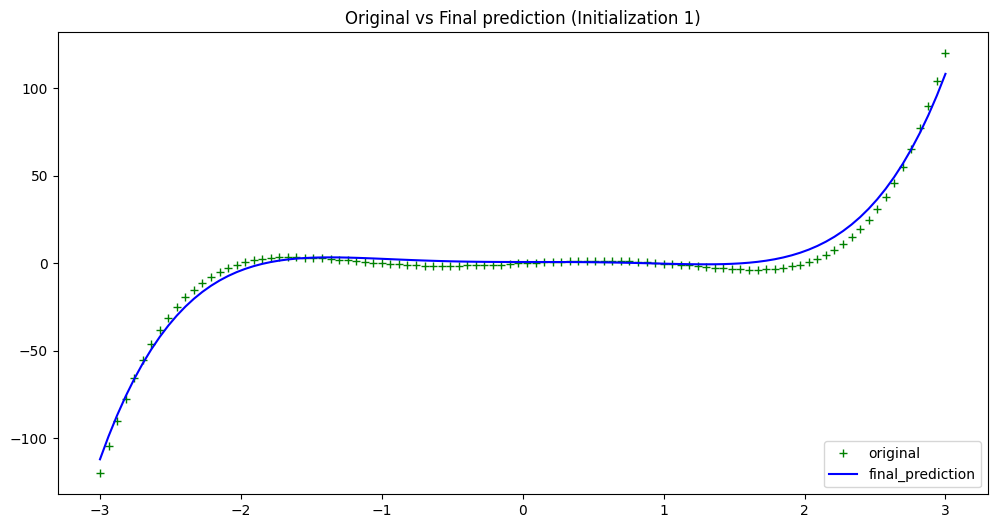

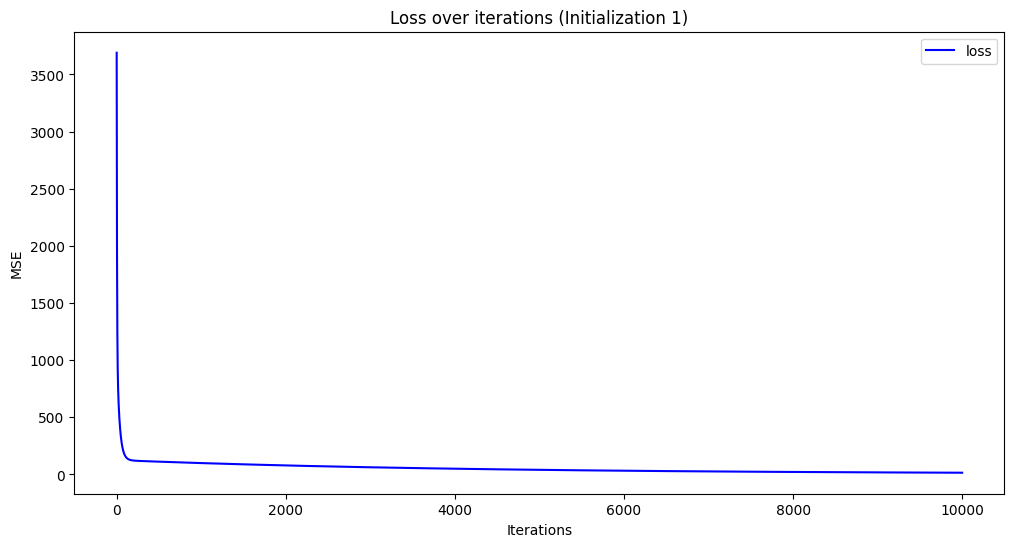

Final Coefficients (Initialization 1): [0.6771949760732117, -0.09213822864712405, -2.0088593575907785, 0.5386160379612017, -0.05391877492482388, 0.770346412690438]
Final Loss (Initialization 1): 14.612675814439283
---


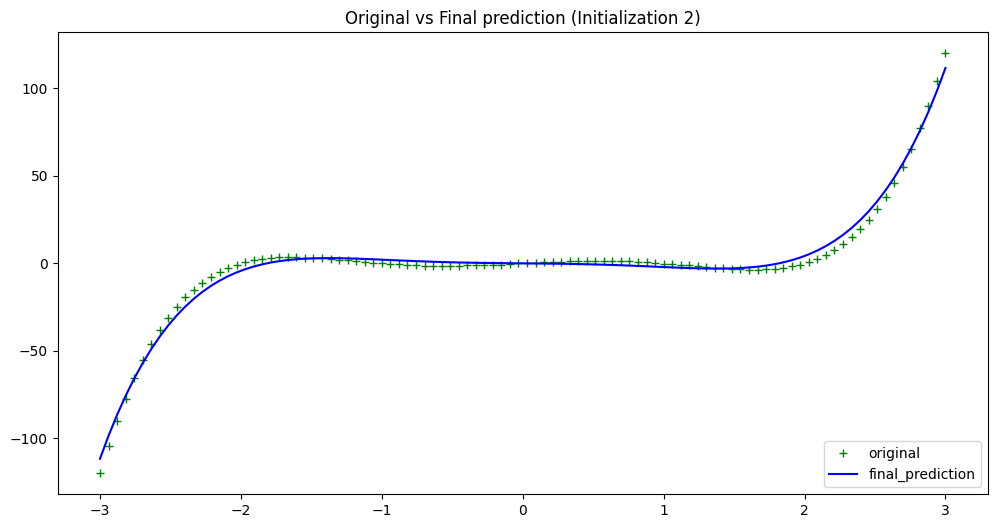

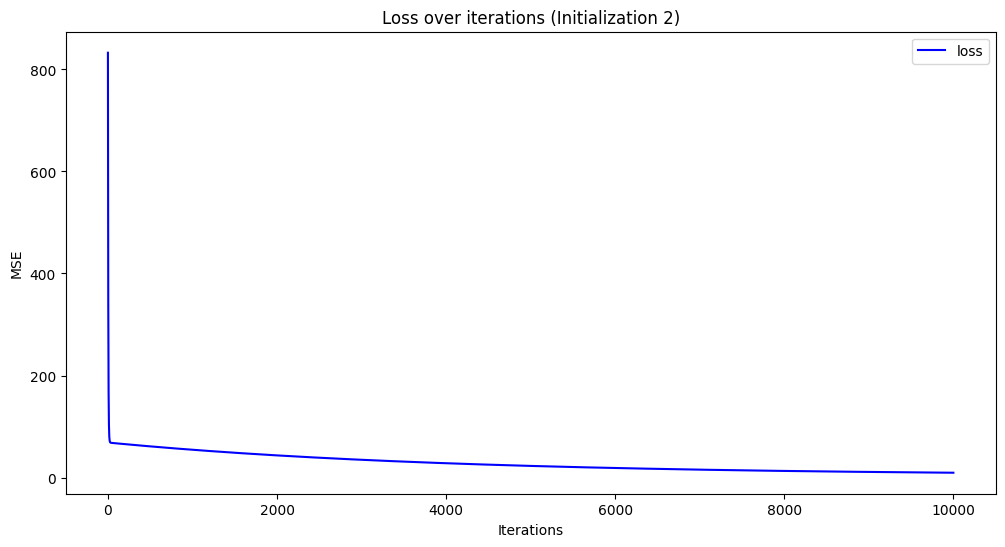

Final Coefficients (Initialization 2): [0.7022598487929351, 5.198235390469375e-06, -2.105011741884434, 0.00010480928654531493, -0.7085636109235346, -8.45288617473487e-05]
Final Loss (Initialization 2): 9.470928248533648
---


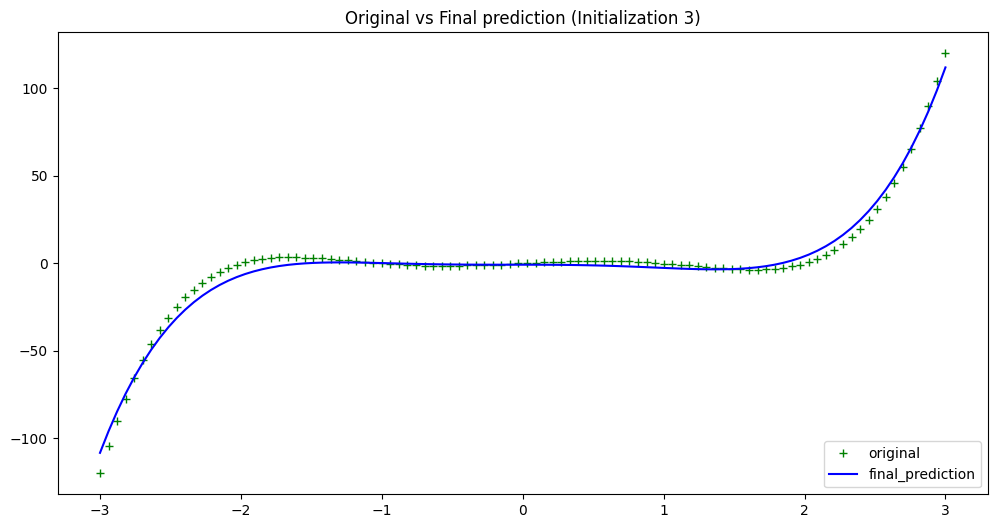

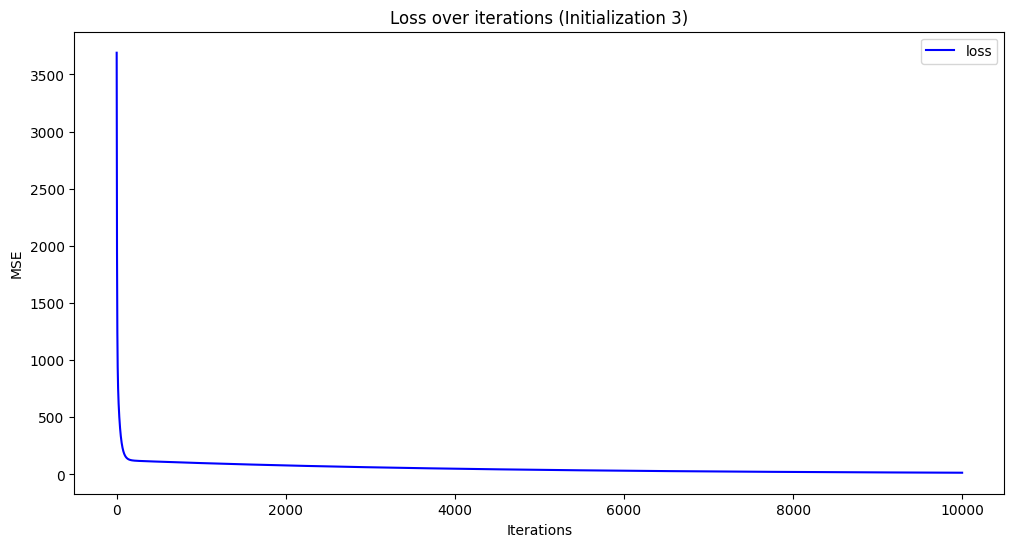

Final Coefficients (Initialization 3): [0.6771949760732119, 0.09214862511790532, -2.0088593575907794, -0.5384064193881126, -0.053918774924823734, -0.7705154704139378]
Final Loss (Initialization 3): 14.612386313371013
---


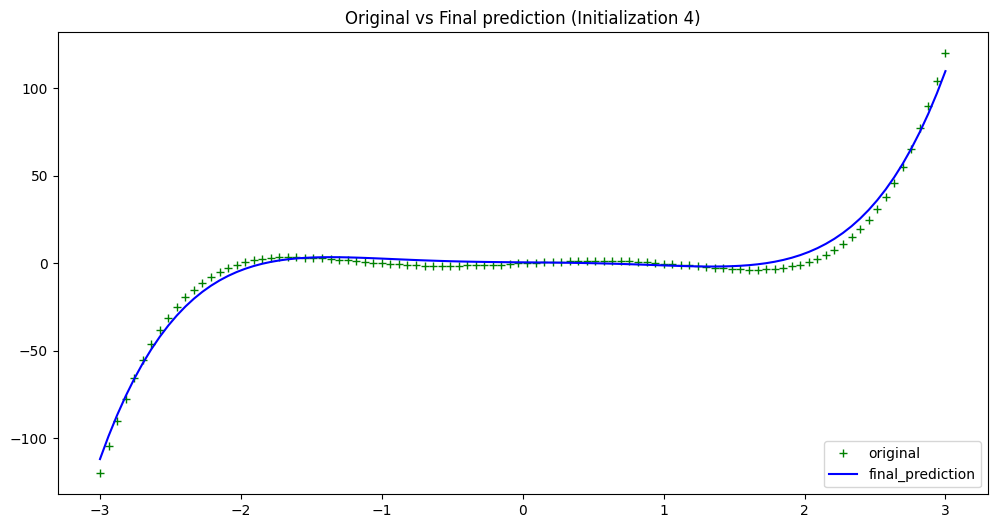

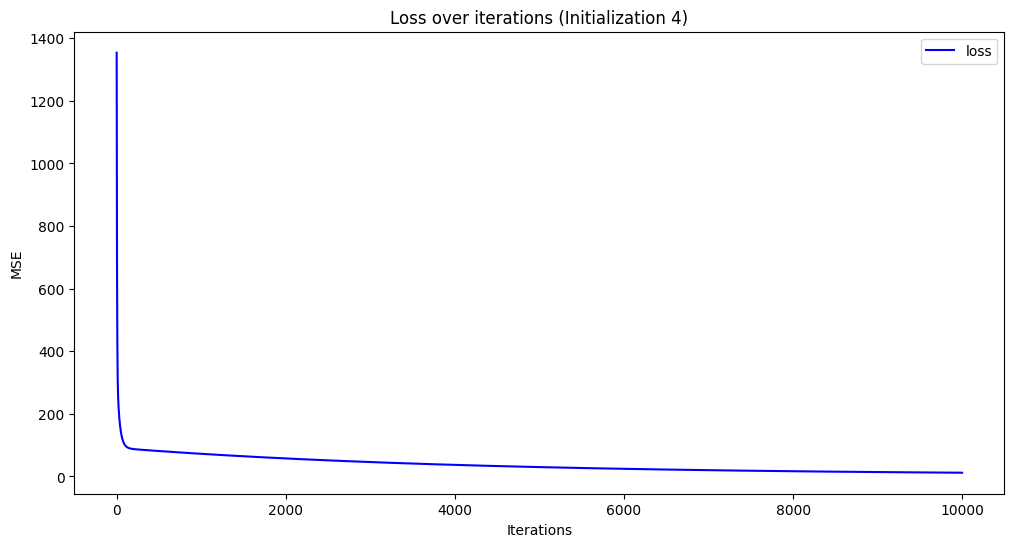

Final Coefficients (Initialization 4): [0.6832642368530851, -0.04591614251163141, -1.9690290347396109, 0.23788313071846923, -0.6621870525459294, 0.583569558046072]
Final Loss (Initialization 4): 11.77542930550396
---


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    return sum(coeff * x**(5-i) for i, coeff in enumerate(coeffs))

def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y, lr):
    gradients = [0] * 6
    y_bars = np.array([eval_5th_degree(coeffs, x) for x in inputs_x])

    for i in range(6):
        gradients[i] = np.mean(-2 * (outputs_y - y_bars) * inputs_x**(5-i))

    new_coeffs = [coeff - lr * grad for coeff, grad in zip(coeffs, gradients)]
    new_y_bar = np.array([eval_5th_degree(new_coeffs, x) for x in inputs_x])
    updated_model_loss = np.mean((outputs_y - new_y_bar)**2)

    return updated_model_loss, new_coeffs, new_y_bar

def gradient_descent_5th(coeffs, inputs_x, outputs_y, epochs, lr):
    losses = []
    for _ in range(epochs):
        loss, coeffs, y_bar = calc_gradient_5th_poly(coeffs, inputs_x, outputs_y, lr)
        losses.append(loss)
    return loss, coeffs, y_bar, losses

# Generate data for a 5th degree polynomial with 5 roots
x = np.linspace(-3, 3, 100)
y = (x+2)*(x+1)*x*(x-1)*(x-2) + np.random.normal(0, 0.1, 100)

# Try different initializations
initializations = [
    [1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0],
    [1, -1, 1, -1, 1, -1],
    np.random.rand(6)
]

for i, init in enumerate(initializations):
    GD = gradient_descent_5th(init, x, y, 10000, 0.00001)

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'g+', label='original')
    plt.plot(x, GD[2], 'b-', label='final_prediction')
    plt.title(f'Original vs Final prediction (Initialization {i+1})')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(GD[3], 'b-', label='loss')
    plt.title(f'Loss over iterations (Initialization {i+1})')
    plt.legend(loc="upper right")
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()

    print(f"Final Coefficients (Initialization {i+1}): {GD[1]}")
    print(f"Final Loss (Initialization {i+1}): {GD[0]}")
    print("---")

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-21-675a3bbbe47e>:13: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)


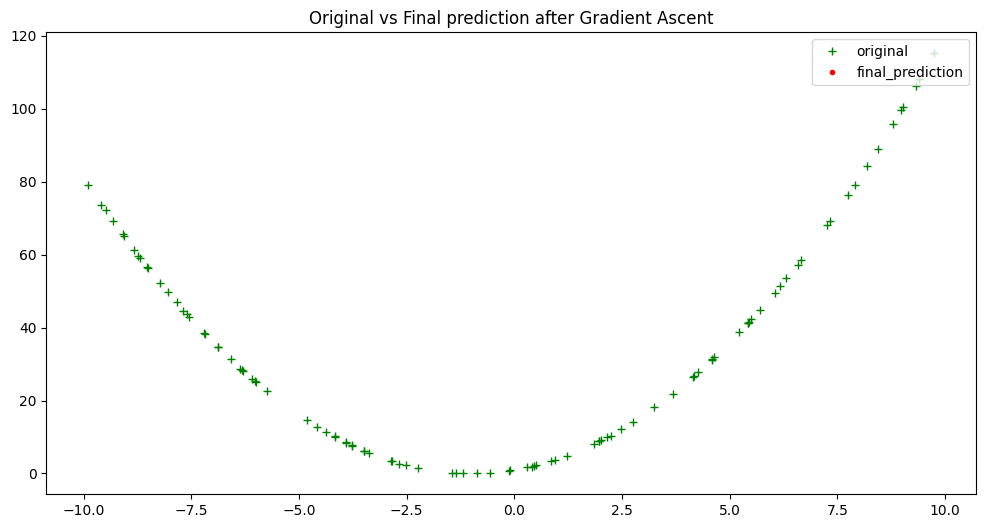

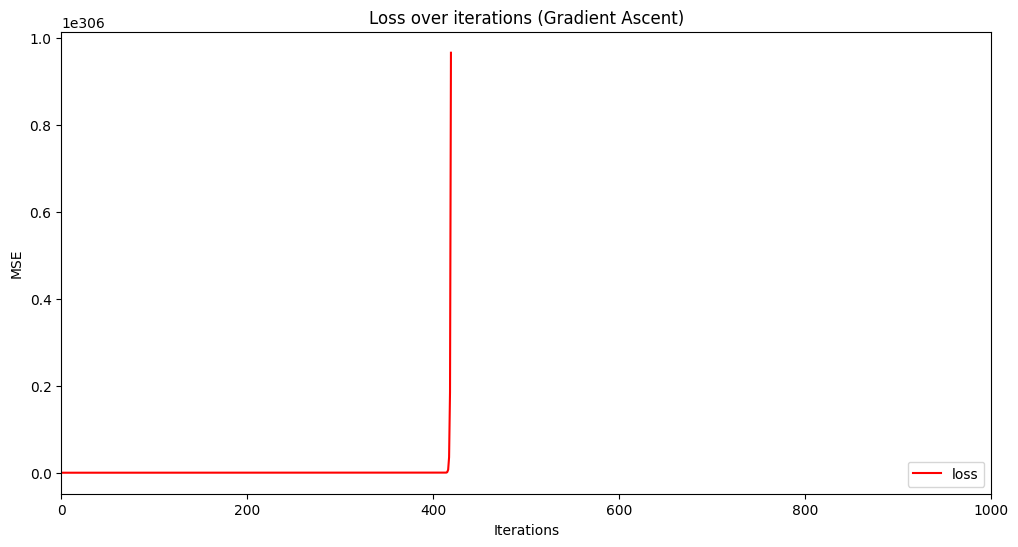

Final Coefficients predicted (Maxima): (nan, nan, nan)
Original Coefficients: [1, 2, 1]


In [21]:
def calc_gradient_2nd_poly_for_GD_maxima(coeffs, inputs_x, outputs_y, lr):
    a_s, b_s, c_s = [], [], []
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_squared = x ** 2
        a_s.append(x_squared * (y - y_bar))
        b_s.append(x * (y - y_bar))
        c_s.append(y - y_bar)

    n = len(y_bars)
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    # Change subtraction to addition to find maxima
    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    updated_model_loss = loss_mse(outputs_y, new_y_bar)

    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_ascent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for _ in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD_maxima(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses

# Run gradient ascent
GA = gradient_ascent(30000, 0.0003)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GA[2], 'r.', label='final_prediction')
plt.title('Original vs Final prediction after Gradient Ascent')
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(GA[3], 'r-', label='loss')
plt.title('Loss over iterations (Gradient Ascent)')
plt.legend(loc="lower right")
plt.xlim((0,1000))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

print(f"Final Coefficients predicted (Maxima): {GA[1]}")
print(f"Original Coefficients: {coeffs}")

## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

## Additional Critical Thinking Questions

### 1. Full Batch Gradient Descent and Data Shuffling
**Q:** You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.

**A:** Nah, for full batch gradient descent, shuffling isn't really necessary. Here's why:

- We're using **ALL** the data in each step anyway, so the order doesn't matter.
- The gradient and loss will be the same no matter how we arrange the data.
- It's not like mini-batch or stochastic gradient descent where we use small subsets of data.

Basically, since we're looking at the whole dataset each time, shuffling won't change what the algorithm sees or how it updates. It's kind of like shuffling a deck of cards before dealing them all out - the end result is the same!

### 2. Mini-Batch Gradient Descent for Image Classification
**Q:** You would like to train a dog/cat image classifier using mini-batch gradient descent. You have already split your dataset into train, dev, and test sets. The classes are balanced. You realize that within the training set, the images are ordered in such a way that all the dog images come first and all the cat images come after. A friend tells you: "you absolutely need to shuffle your training set before the training procedure." Is your friend right? Explain.

**A:** Yep, my friend is totally right here! We definitely need to shuffle the training set. Here's the deal:

- We're using mini-batches, not the whole dataset at once.
- If we don't shuffle, we'd be training on all dogs first, then all cats. That's a problem because:
  - The model would be learning about one animal at a time, which could make the learning process unstable.
  - It might get really good at recognizing dogs before it even sees a cat!
  - Each mini-batch would only have one type of animal, which doesn't represent the whole dataset well.

By shuffling, we mix up the dogs and cats. This means:

- Each batch has a mix of both animals.
- The model learns about both classes together, which is way better for overall performance.
- It helps prevent the model from getting "biased" towards one class.